# Random Forest

## 1. What is Random Forest?
Random Forest is an ensemble machine learning algorithm that creates multiple decision trees and combines their outputs to produce a final prediction.
It is based on the concept of bagging (Bootstrap Aggregating) and random feature selection.
Random Forest can be used for both classification and regression tasks.

---

## 2. How Random Forest Works

### Step 1: Bootstrapping the Data
- From the original dataset, multiple subsets are created by sampling with replacement.
- Each subset will have the same number of rows as the original dataset, but because of sampling with replacement, some rows will be repeated while others will be left out.

### Step 2: Random Feature Selection
- When building each decision tree, the algorithm does not consider all features at every split.
- Instead, it randomly selects a subset of features and chooses the best split from that subset.
- This reduces correlation between the trees.

### Step 3: Building Decision Trees
- Each subset of data is used to build a decision tree.
- The trees are typically grown to a large depth without pruning.
- Because each tree is built on different data and different features, the trees are diverse.

### Step 4: Making Predictions
- For classification tasks:
  - Each tree predicts a class label.
  - The final prediction is made by taking the majority vote across all trees.
- For regression tasks:
  - Each tree predicts a numerical value.
  - The final prediction is made by averaging the outputs from all trees.

---

## 3. Advantages of Random Forest
- **Reduces Overfitting**: Averaging predictions from multiple trees reduces variance compared to a single decision tree.
- **Robustness**: Works well with noisy data and can handle missing values.
- **Feature Importance**: Automatically provides estimates of which features are most important in prediction.
- **Versatility**: Can handle both numerical and categorical features.
- **Scalability**: Can be parallelized because each tree is built independently.

---

## 4. Disadvantages of Random Forest
- **Computationally Intensive**: Training many trees can be slower and require more memory compared to a single decision tree.
- **Less Interpretability**: Harder to interpret than a single decision tree because there are many trees involved.
- **Possible Overfitting**: If the number of trees is too small or trees are too deep for small datasets, it can still overfit.

---

## 5. Real-World Analogy
Imagine you need to make a decision on whether a new restaurant is worth trying. Instead of relying on the opinion of one friend (a single decision tree), you ask twenty different friends (the forest), each of whom might have tried different dishes on different days. You then make your decision based on the majority opinion. This collective approach is generally more reliable than relying on a single opinion.


In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



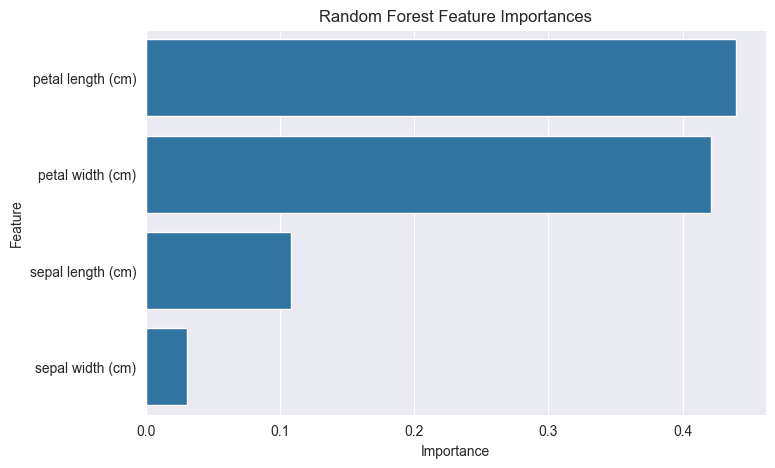

In [3]:
importances = rf.feature_importances_
feature_names = X.columns
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Random Forest Feature Importances')
plt.show()


In [4]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
best_pred = best_model.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, best_pred))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Tuned Model Accuracy: 1.0
